# Hypothesis Testing - Overview Exercises
Do your work for this exercise in a jupyter notebook named hypothesis_testing.ipynb.

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

### 1. Has the network latency gone up since we switched internet service providers?

$H_{0}$ : There is no difference in network latency since we switched internet service providers.

$H_{\alpha}$ There has been an improvement in network latency since we switched internet service providers.

True Positive: If we reject $H_{0}$ and there is no difference in network latency.

True Negative: If we reject $H_{0}$ and there is an improvement in network latency.

Type I error (false positive): If we reject $H_{0}$ and that there is no difference in network latency. 

Type II error (false negative): If we fail to reject $H_{0}$ and that there is an improvement in network latency.


### 2. Is the website redesign any good?

$H_{0}$: There is no difference in website performance since the redesign. 

$H_{\alpha}$ There is an improvement in website performance since the redesign.

True Positive: If we reject $H_{0}$ and there is no difference in website performance.

True Negative: If we reject $H_{0}$ and there is an improvement in website performance.

Type I error: If we reject $H_{0}$ and that there is no difference in website performance. 

Type II error: If we fail to reject $H_{0}$ and that there is an improvement in website performance.

### 3. Is our television ad driving more sales?

$H_{0}$:  There is no difference in sales since airing the television ad.

$H_{\alpha}$:  There is an increase in sales since airing the television ad.

True Negative: If we fail to reject $H_{0}$ and there is no difference in sales.

True Postive: If we reject $H_{0}$ and there is an increase in sales.

Type I error: If we reject $H_{0}$ and that there is no difference in sales. 

Type II error: If we fail to reject $H_{0}$ and that there is an increase in sales.

### $chi^2$ Exercises

In [1]:
import numpy as np
import pandas as pd

from pydataset import data
from scipy import stats

## Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

 				Codeup Student	Not Codeup Student
	Uses a Macbook		49		20
	Doesn't Use A Macbook	1		30

### Form hypothesis

$H_o$: there is no association between being a codeup student and using a macbook

$H_a$: there is a association between being a codeup student and using a macbook

In [2]:
alpha = 0.05

### Make contigency tables

In [3]:
observed = pd.DataFrame([[49,20],[1,30]])
observed

,0,1
0,49,20
1,1,30


### Calculate chi2 and p-value

In [4]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [5]:
#output values
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p}')

Observed
[[49 20]
 [ 1 30]]

Expected
[[34 34]
 [15 15]]

----
chi^2 = 36.6526
p     = 1.4116760526193828e-09


### Conclude

In [6]:
if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis


## Choose another 2 categorical variables from the mpg dataset and perform a chi2 contingency table test with them. Be sure to state your null and alternative hypotheses.

In [7]:
#import data from pydataset
df = data('mpg')
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [8]:
#look at info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


In [9]:
#use .nunique to see which columns have categorical variables
df.nunique()

manufacturer    15
model           38
displ           35
year             2
cyl              4
trans           10
drv              3
cty             21
hwy             27
fl               5
class            7
dtype: int64

In [10]:
#look at year data
df.year.value_counts()

1999    117
2008    117
Name: year, dtype: int64

In [11]:
#look at cyl data
df.cyl.value_counts()

4    81
6    79
8    70
5     4
Name: cyl, dtype: int64

### Form hypothesis

$H_o$: there is no association between the car year and cylinder

$H_a$: there is a association between the car year and cylinder

### Make contigency table

In [12]:
observed = pd.crosstab(df.year, df.cyl)
observed

cyl,4,5,6,8
year,,,,
1999,45,0,45,27
2008,36,4,34,43


### Calculate $chi^2$ and p-value

In [13]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [14]:
#output values
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[45  0 45 27]
 [36  4 34 43]]

Expected
[[40  2 39 35]
 [40  2 39 35]]

----
chi^2 = 10.1888
p     = 0.0170


### Conclude

In [15]:
if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis


## Use the data from the employees database to answer these questions:

In [16]:
from env import get_connection
from sqlalchemy import create_engine, text

In [17]:
def get_db_url(database):
    return get_connection(database)

In [18]:
#set sql query and read in data
url = get_db_url('employees')
query = text("select emp_no, gender, dept_name from employees join dept_emp using (emp_no) join departments using (dept_no) where to_date = '9999-01-01' and dept_name in ('Marketing','Sales')")
engine = create_engine(url)
df = pd.read_sql(query, engine.connect())
df

,emp_no,gender,dept_name
0,10017,F,Marketing
1,10058,M,Marketing
2,10140,F,Marketing
3,10228,F,Marketing
4,10239,F,Marketing
...,...,...,...
52538,499966,F,Sales
52539,499976,M,Sales
52540,499980,M,Sales
52541,499986,F,Sales


In [19]:
#view gender data
df.gender.value_counts()

M    31680
F    20863
Name: gender, dtype: int64

In [20]:
#view dept_name data
df.dept_name.value_counts()

Sales        37701
Marketing    14842
Name: dept_name, dtype: int64

In [21]:
#create contigency table
observed = pd.crosstab(df.gender, df.dept_name)
observed

dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


In [22]:
#calculate chi2 and p-value
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [23]:
#output values
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[ 5864 14999]
 [ 8978 22702]]

Expected
[[ 5893 14969]
 [ 8948 22731]]

----
chi^2 = 0.3240
p     = 0.5692


In [24]:
#conclude
if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We fail to reject the null hypothesis


## Is an employee's gender independent of whether or not they are or have been a manager?

$H_o$: there is no association between being a persons gender and being a manager

$H_a$: there is a association between being a persons gender and being a manager

In [25]:
#set sql query and read in data
url = get_db_url('employees')
query = text("SELECT emp_no, gender, dept_no FROM employees LEFT JOIN dept_manager USING (emp_no)")
engine = create_engine(url)
df = pd.read_sql(query, engine.connect())
df

,emp_no,gender,dept_no
0,10001,M,None
1,10002,F,None
2,10003,M,None
3,10004,M,None
4,10005,M,None
...,...,...,...
300019,499995,F,None
300020,499996,M,None
300021,499997,M,None
300022,499998,M,None


In [26]:
#look at data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   emp_no   300024 non-null  int64 
 1   gender   300024 non-null  object
 2   dept_no  24 non-null      object
dtypes: int64(1), object(2)
memory usage: 6.9+ MB


In [27]:
#look at dept_no data
df.dept_no.value_counts(dropna=False)

None    300000
d004         4
d006         4
d009         4
d001         2
d002         2
d003         2
d005         2
d007         2
d008         2
Name: dept_no, dtype: int64

In [28]:
#fill in nulls
df.dept_no = df.dept_no.fillna('not manager')

In [29]:
df.dept_no.value_counts()

not manager    300000
d004                4
d006                4
d009                4
d001                2
d002                2
d003                2
d005                2
d007                2
d008                2
Name: dept_no, dtype: int64

In [30]:
#make new column using np.where
# np.where( condtion, this happens when true, this happens when false)
df.dept_no = np.where( df.dept_no != 'not manager', 'manager', 'not manager')

In [31]:
df.dept_no.value_counts()

not manager    300000
manager            24
Name: dept_no, dtype: int64

In [32]:
#create contigency table
observed = pd.crosstab(df.gender, df.dept_no)
observed

dept_no,manager,not manager
gender,,
F,13,120038
M,11,179962


In [33]:
#calculate chi2 and p-value
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [34]:
#output values
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[    13 120038]
 [    11 179962]]

Expected
[[     9 120041]
 [    14 179958]]

----
chi^2 = 1.4567
p     = 0.2275


In [35]:
#conclude
if p < alpha:
    print('We reject the null hypothesis')
else:
    print("we fail to reject the null hypothesis")

we fail to reject the null hypothesis


---
# Correlation Exercises

Continue working in your hypothesis_testing notebook.

1. Answer with the type of stats test you would use (assume normal distribution):

* Is there a relationship between the length of your arm and the length of your foot?
                Pearson R

* Does smoking affect when or not someone has lung cancer?
                $chi^2$

* Is gender independent of a person’s blood type?
                $chi^2$

* Does whether or not a person has a cat or dog affect whether they live in an apartment?
                $chi^2$
                
* Does the length of time of the lecture correlate with a student's grade?
                 Pearson R


2. Use the telco_churn data.
* Does tenure correlate with monthly charges?
* Total charges?
* What happens if you control for phone and internet service?

3. Use the employees database.
* Is there a relationship between how long an employee has been with the company and their salary?
* Is there a relationship between how long an employee has been with the company and the number of titles they have had?

4. Use the sleepstudy data.
* Is there a relationship between days and reaction time?

In [36]:
from env import get_connection
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import text, create_engine

---
<div class="alert alert-block alert-info">

1. Answer with the type of stats test you would use (assume normal distribution)

* Is there a relationship between the length of your arm and the length of your foot?

* Does smoking affect when someone has lung cancer?        

* Is gender independent of a person's blood type? 

* Does whether or not a person has a cat or dog affect whether they live in an apartment?

* Does the length of time of the lecture correlate with a students grade?


---
<div class="alert alert-block alert-info">
2. Use the telco_churn data

* Does tenure correlate with monthly charges?
* Total charges?
* What happens if you control for phone and internet service?

In [37]:
def get_db_url(database):
    return get_connection(database)

url = get_db_url('telco_churn')
query = ('SELECT * FROM customers')
engine = create_engine(url)

In [38]:
df = pd.read_sql(query, engine.connect())
df

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.60,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.90,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.90,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.00,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.90,267.4,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,1,Yes,...,No,Yes,No,No,2,No,2,55.15,742.9,No
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,2,No,...,No,No,No,Yes,1,Yes,1,85.10,1873.7,Yes
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,1,No,...,No,No,No,No,1,Yes,2,50.30,92.75,No
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,1,Yes,...,Yes,Yes,No,Yes,3,No,2,67.85,4627.65,No


<div class="alert alert-block alert-info">
A. Does tenure correlate with monthly charges?

Hypothesis:

$H_0$: there is no linear correlation between tenure and monthly charges.

$H_a$: there is a linear correlation between tenure and monthly charges. 

<Axes: xlabel='tenure', ylabel='monthly_charges'>

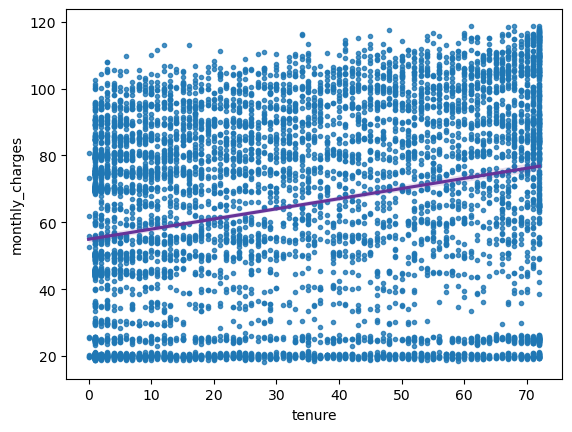

In [39]:
# select the data
charges_df = df[['monthly_charges', 'tenure']]

# plot the data
sns.regplot(x='tenure', y='monthly_charges', data=charges_df, marker='.', line_kws={'color': 'rebeccapurple'})

<Axes: >

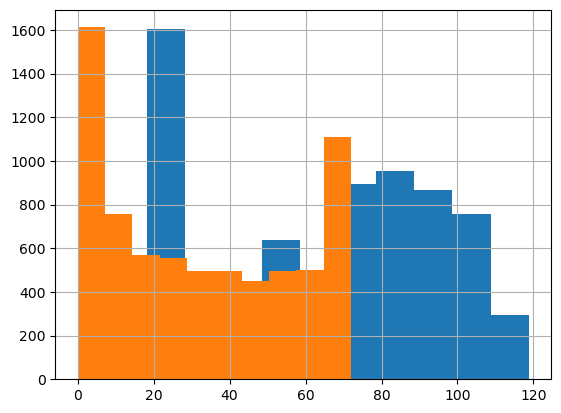

In [40]:
# distributions of the data to check for normalcy
charges_df.monthly_charges.hist()
charges_df.tenure.hist()

In [41]:
alpha = 0.05
r, p = stats.pearsonr(charges_df.tenure, charges_df.monthly_charges)

def eval_result(alpha, p):
    if p < alpha:
        return print(f'Reject the null hypothesis. There is a linear correlation (p-value: {p})')
    else:
        return print(f'We fail to reject the null hypothesis that there is a linear correlation (p-value: {p})')

In [42]:
eval_result(alpha, p)
r

Reject the null hypothesis. There is a linear correlation (p-value: 4.094044991476844e-99)


0.24789985628615246

<div class="alert alert-block alert-success">

**Takeaways**

There is a correlation between monthly charges and tenure. 
With an r of .24, we can say the correlation is "weak-moderate"

<div class="alert alert-block alert-info">
B. Does tenure correlate with total charges?

Hypothesis: 

$H_0$ : There is no linear correlation between tenure and total charges.

$H_a$ : There is a linear correlation between tenure and total charges.

In [43]:
alpha = 0.05

# select the data
ttl_charges_df = df[['tenure', 'total_charges']]

# look at a summary of the dataframe
# ttl_charges_df.info()

# try to find the data errors
ttl_charges_df.total_charges.sort_values()

# convert the empty space to '0'
ttl_charges_df['total_charges'] = ttl_charges_df['total_charges'].str.replace(' ', '0').astype('float')

# confirm our datatypes
ttl_charges_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tenure         7043 non-null   int64  
 1   total_charges  7043 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 110.2 KB


/var/folders/k8/ltyv8jfd0b54p8nfncshc01w0000gn/T/ipykernel_16682/3437671544.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ttl_charges_df['total_charges'] = ttl_charges_df['total_charges'].str.replace(' ', '0').astype('float')


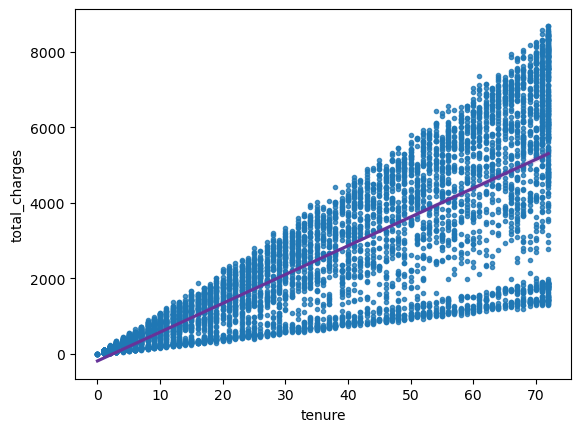

In [44]:
# plot the data
sns.regplot(x = 'tenure', y='total_charges', data = ttl_charges_df, marker='.', line_kws={'color': 'rebeccapurple'})
plt.show()

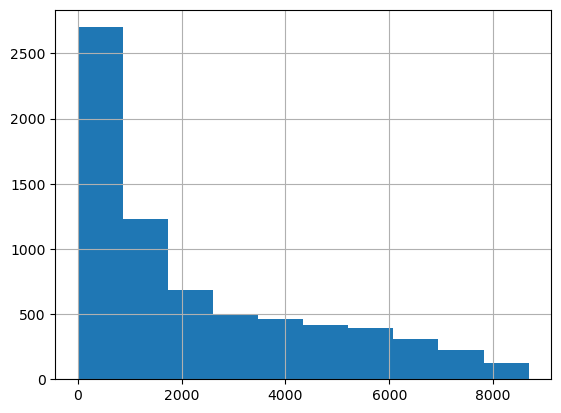

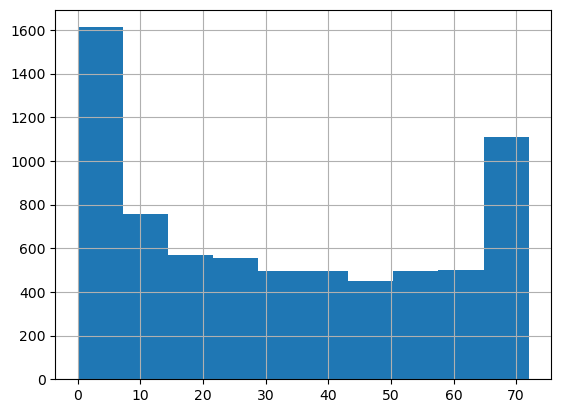

In [45]:
# check assumptions
ttl_charges_df.total_charges.hist()
plt.show()
ttl_charges_df.tenure.hist()
plt.show()

In [46]:
# run our test
r, p = stats.pearsonr(ttl_charges_df.tenure, ttl_charges_df.total_charges)

eval_result(alpha, p)

r

Reject the null hypothesis. There is a linear correlation (p-value: 0.0)


0.8261783979502481

<div class="alert alert-block alert-success">
**Takeaway**

* There is a linear correlation between tenure and total charges. 

* With an r of .83, the correlation is strong. 

<div class="alert alert-block alert-info">
C. What happens if you control for phone and internet service?

Hypothesis:

$H_0$ : there is no linear correlation between tenure and monthly charges. 

$H_a$ : there is a linear correlation between tenure and monthly charges.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1739 entries, 0 to 7041
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tenure           1739 non-null   int64  
 1   monthly_charges  1739 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 40.8 KB


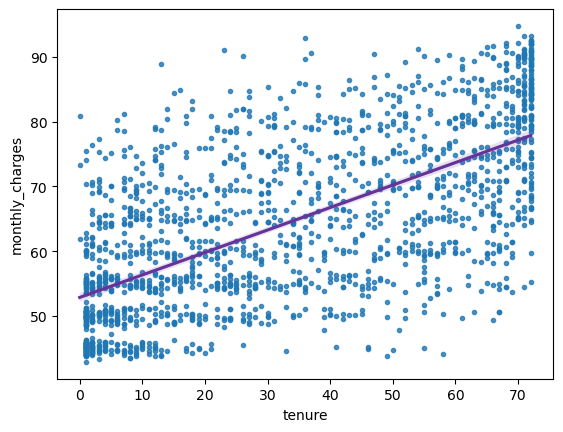

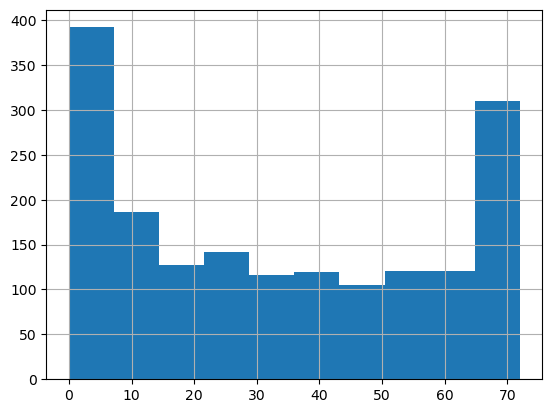

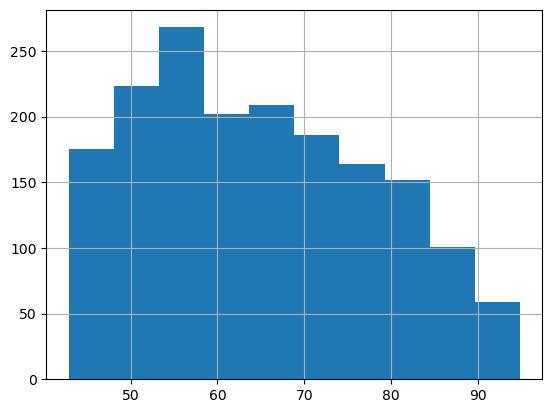

In [47]:
# set alpha
alpha = 0.05

# select the data
phone_df = df[(df.phone_service == 'Yes') & (df.internet_service_type_id == 1)][['tenure', 'monthly_charges']]

# look at info
phone_df.info()

# plot the data
sns.regplot(x='tenure', y='monthly_charges', data=phone_df, marker='.', 
            line_kws=({'color': 'rebeccapurple'}))
plt.show()

# check for normal distribution

phone_df.tenure.hist()
plt.show()

phone_df.monthly_charges.hist()
plt.show()

In [48]:
r, p = stats.pearsonr(phone_df.tenure, phone_df.monthly_charges)

eval_result(alpha, p)

print(f'r value = {r}')

Reject the null hypothesis. There is a linear correlation (p-value: 5.6762026836261174e-214)
r value = 0.6553845618157271


<div class="alert alert-block alert-success">
**Takeaways**

* There is a moderate-strong correlation betwen tenure and monthly charges for customers who have only phone service. 

---
<div class="alert alert-block alert-info">

**3. Use the employees database.**

* Is there a relationship between how long an employee has been with the company and their salary?

* Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [49]:
url = get_db_url('employees')

query = ("SELECT * FROM employees JOIN salaries USING (emp_no) WHERE to_date = '9999-01-01';")
engine = create_engine(url)
df = pd.read_sql(query, engine.connect())
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   emp_no      240124 non-null  int64 
 1   birth_date  240124 non-null  object
 2   first_name  240124 non-null  object
 3   last_name   240124 non-null  object
 4   gender      240124 non-null  object
 5   hire_date   240124 non-null  object
 6   salary      240124 non-null  int64 
 7   from_date   240124 non-null  object
 8   to_date     240124 non-null  object
dtypes: int64(2), object(7)
memory usage: 16.5+ MB


,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,94692,2001-09-09,9999-01-01


<div class="alert alert-block alert-success">
A. Is there a relationship between an employee's tenure and their salary?

Hypothesis: 

$H_0$: there is no linear correlation between employee tenure and salary. 

$H_a$: there is a linear correlation between employee tenure and salary. 

<Axes: xlabel='tenure', ylabel='salary'>

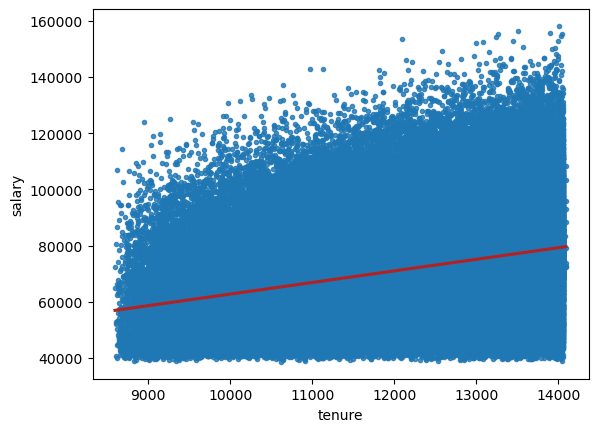

In [50]:
alpha = 0.05

# select our data, calculate tenure
df['tenure'] = pd.to_datetime("today") - pd.to_datetime(df.hire_date) # ddddd hh:mm:ss

df['tenure'] = df.tenure.astype('str').str.split(' ', expand=True)[0].astype('int')

# df.info()
tenure_df = df[['tenure', 'salary']]

# plot the data
sns.regplot(x='tenure', y='salary', data=tenure_df, marker='.',  line_kws=({'color': 'firebrick'}))
#plt.axhline(y=np.nanmean(df.y))


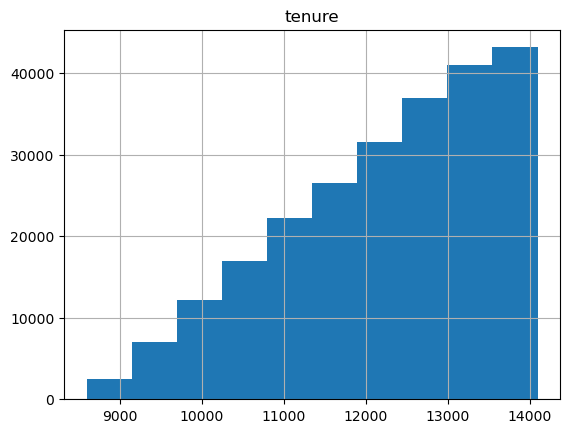

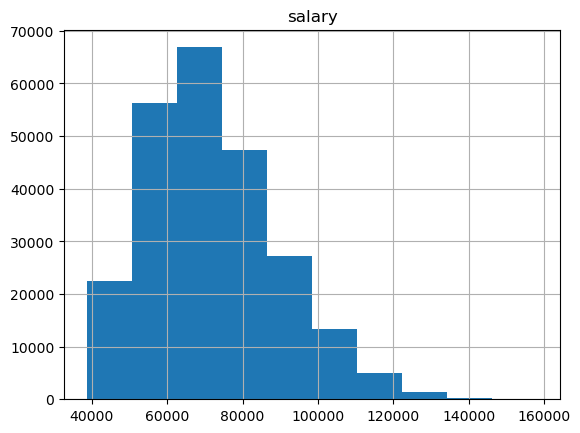

In [51]:
# look at the distribution, look for normality

tenure_df.tenure.hist()
plt.title('tenure')
plt.show()
tenure_df.salary.hist()
plt.title('salary')
plt.show()

In [52]:
# run the test
r, p = stats.pearsonr(tenure_df.tenure, tenure_df.salary)

# evaluate results
eval_result(alpha, p)

print('r value: ', r)

Reject the null hypothesis. There is a linear correlation (p-value: 0.0)
r value:  0.3064625613186014


<div class="alert alert-block alert-success">
**Takeaways**

* There is a moderate correlation between tenure and salary. 

<div class="alert alert-block alert-info">

Is there a relationship between employee tenure and the number of titles they have had?

Hypothesis: 

$H_0$ : there is no linear correlation between tenure and number of titles. 

$H_a$ : there is a linear correalation between tenure and number of titles. 

In [53]:
alpha = 0.05

# select the data
url = get_db_url('employees')

query = text("SELECT t.emp_no, COUNT(t.title) AS num_titles, te.tenure FROM titles t JOIN (select emp_no, datediff(now(), min(from_date)) AS tenure FROM titles GROUP BY emp_no HAVING max(to_date) = '9999-01-01') te USING (emp_no) GROUP BY t.emp_no;")
engine = create_engine(url)
df = pd.read_sql(query, engine.connect())

df.head()

,emp_no,num_titles,tenure
0,10001,1,13553
1,10002,1,9862
2,10003,1,10106
3,10004,2,13395
4,10005,2,12379


<Axes: xlabel='tenure', ylabel='num_titles'>

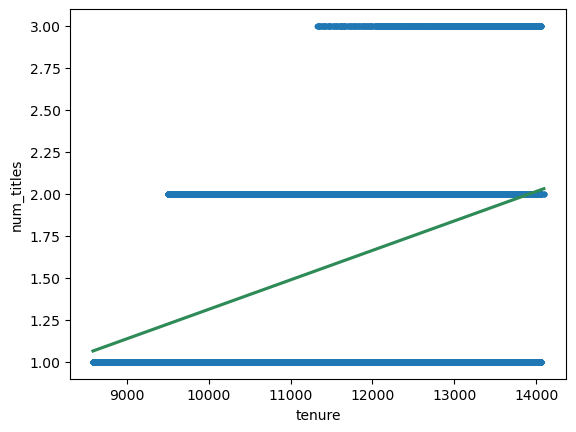

In [54]:
df = df[['num_titles', 'tenure']]

# plot the data
sns.regplot(x='tenure', y='num_titles', data=df, marker='.', line_kws=({'color': 'seagreen'}))

In [55]:
# observatations:
df.num_titles.value_counts()

2    125345
1    111892
3      2887
Name: num_titles, dtype: int64

In [56]:
r, p = stats.pearsonr(df.tenure, df.num_titles)

if p < alpha:
    print("We reject the null hypothesis")
    print("Evidence supports the claim that there is a linear correlation between tenure and number of titles")
else:
    print("We fail to reject the null hypothesis")

r, p

We reject the null hypothesis
Evidence supports the claim that there is a linear correlation between tenure and number of titles


(0.5311014974074266, 0.0)

<div class="alert alert-block alert-success">

**Takeaways**

* There is a difference in tenure and number of titles an employee has held. 

---
<div class="alert alert-block alert-info">

**4. Use the sleepstudy data**

A. Is there a relationship between days and reaction time?

In [57]:
from pydataset import data
df = data('sleepstudy')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 1 to 180
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Reaction  180 non-null    float64
 1   Days      180 non-null    int64  
 2   Subject   180 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 5.6 KB


,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


Hypothesis: 

* $H_0$: there is no linear correlation between days and reaction time

* $H_a$: there is a linear correlation between days and reaction time



<Axes: xlabel='Days', ylabel='Reaction'>

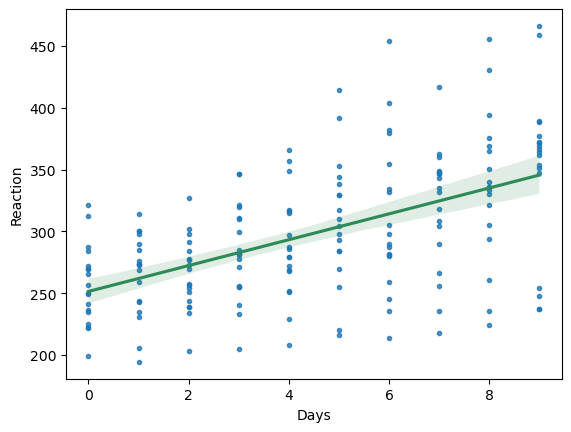

In [58]:
alpha = 0.05

# select the data
df = df[['Reaction', 'Days']]

# plot the data
sns.regplot(x='Days', y='Reaction', data=df, marker='.', line_kws=({'color':'seagreen'}))

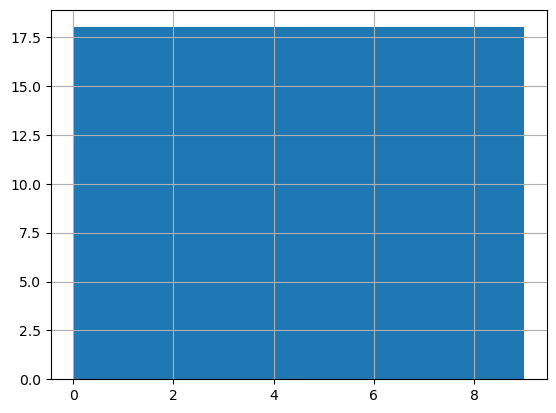

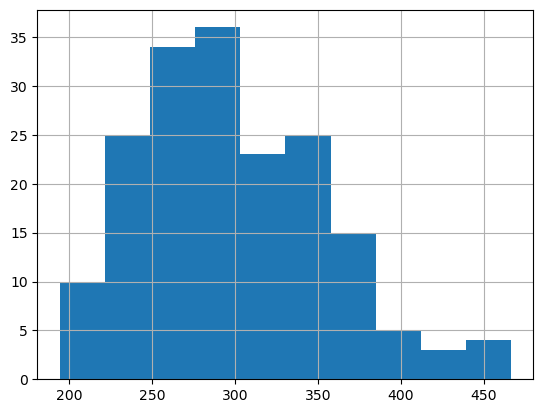

In [59]:
# check for normal distribution, plot histograms
df.Days.hist()
plt.show()

df.Reaction.hist()
plt.show()

Days is uniformly distributed, and reaction time is normally distributed. 

In [60]:
# run the spearman test
r, p = stats.spearmanr(df.Days, df.Reaction)
eval_result(alpha, p)
print('r value: ', r)

Reject the null hypothesis. There is a linear correlation (p-value: 5.132878057706873e-14)
r value:  0.5228138502259547


<div class="alert alert-block alert-info">
**Takeaways**

* There is a moderate correlation between days and reaction time. 

# Comparison of Means Exercises

1. Answer with the type of test you would use (assume normal distribution):
    - Is there a difference in grades of students on the second floor compared to grades of all students?
    - Are adults who drink milk taller than adults who dont drink milk?
    - Is the the price of gas higher in texas or in new mexico?
    - Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?

<br>

2. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

<br>

3. Load the mpg dataset and use it to answer the following questions:
    - Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
    - Are compact cars more fuel-efficient than the average car?
    - Do manual cars get better gas mileage than automatic cars?



In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt

import scipy.stats as stats
from pydataset import data

#### #1. Answer with the type of test you would use (assume normal distribution):

a. Is there a difference in grades of students on the second floor compared to grades of all students?
* One-sample, two-tailed t-test: This test can determine if there is a significant difference in the grades of students on the second floor compared to the grades of all students in the entire population.

b. Are adults who drink milk taller than adults who don't drink milk?
* Independent (two-sample) sample, one-tail  t-test: This test can assess whether there is a significant difference in the average height between two groups: adults who drink milk and adults who don't drink milk.

c. Is the the price of gas higher in Texas or in New Mexico?
* Independent (two-sample) samples, one-tail t-test: This test can compare the average price of gas in two independent groups, Texas and New Mexico, to determine if there is a significant difference between the two.

d. Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?
* One-way analysis of variance (ANOVA): This test can analyze whether there are significant differences in stress levels among three or more groups (data science students, web development students, and cloud academy students).

<div class="alert alert-block alert-success">

In order to answer questions 2 & 3, we will break down statistical testing.
<br>
<br>
<b>Step-by-Step</b>
1. Plot distribution
2. Set Hypothesis
3. Set Alpha
4. Verify 3 Assumptions
5. Compute Test Statistics
6. Decide
    
</div> 

#### #2. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices

<div class="alert alert-block alert-info">

<b>Let's break it down:</b> 
    <br>
- compare average time selling homes is different at 2 offices
<br>
- office 1: sample size = 40, mean= 90, stddev = 15
    <br>
- office 2: sample size= 50, mean= 100, stddev = 20
    <br>
- alpha = .05
</div>

<b>We are comparing</b>: average time (numeric/continuous) vs two offices (distinct/categorical)
<br>

We will use:
- 2 sample t-test: comparing two offices
- 2 tailed: want to know if the average is larger OR smaller in either office 

In [62]:
##### Step 1: Plot Distribution

In [63]:
#stats.norm(mean, std).rvs(# samples)
office_1 = stats.norm(90, 15).rvs(40)
office_2 = stats.norm(100, 20).rvs(50)

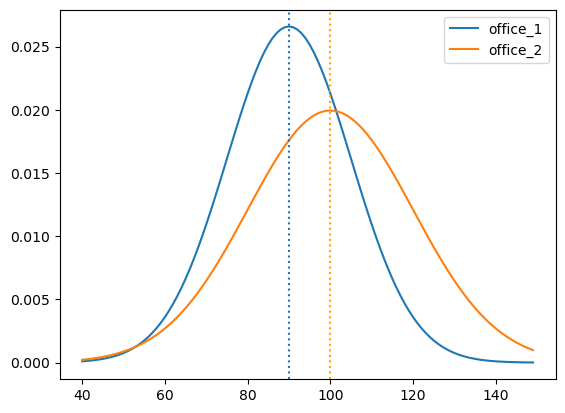

In [64]:
x= np.arange(40,150)

y1 = stats.norm(90,15).pdf(x) #this gives graph for office 1
y2 = stats.norm(100,20).pdf(x) #this gives graph for office 2

plt.plot(x, y1, label='office_1')
plt.plot(x,y2, label = 'office_2')
plt.axvline(90, ls=':')
plt.axvline(100, ls=':', color='orange')

plt.legend()
plt.show()

In [65]:
#let's get the average time to sell homes of office 1
avg_y1 = np.mean(y1)
avg_y1

0.009087128324877411

In [66]:
#let's get the average time to sell homes of office 2
avg_y2= np.mean(y2)
avg_y2

0.009019101164009186

##### Step 2: Set Hypothesis

$H_0$: The variance in office 1 is equivalent to the variance in office 2
<br>
$H_a$: The variance in office 2 is inequal to the variance in office 1

##### Step 3: Set Alpha

In [67]:
#we can use our typical alpha for this example
α = .05

##### Step 4: Verify Assumptions

<div class="alert alert-block alert-info">
<b>We need to ask ourselves:</b> 

1. Are the samples independent? 
    - YES, two seperate data sets
2. Is there normality?      
    - YES, there is normal distribution visually
    - YES, sample sizes are 50 and 40
3. Is there equal variance?  
    - False (see below)
</div>    

#2. Is there normality?

In [68]:
# to find sample size- must more than 30 to meet assumption
len(office_1), len(office_2)

(40, 50)

#3 Is there equal variance?

In [69]:
#this shows the variance is not the same. must set variance to false
y1.var(), y2.var()

(8.839047447475672e-05, 4.684978789008453e-05)

In [70]:
#we can also do a levene test
stat, p_val = stats.levene(office_1, office_2)

In [71]:
if p_val < 0.05:
    print('We can reject H0 ==> inequal variance')

We can reject H0 ==> inequal variance


##### Step 5: Compute Test Statistics

In [72]:
# 2 sample. 2 tailed
t, p = stats.ttest_ind(office_1, office_2, equal_var=False)
t, p, α

(-3.63294852912471, 0.00048223698172231947, 0.05)

In [73]:
p < α

True

##### Step 6: Decide

In [74]:
if p < α:
    print('Our p-value is less than alpha and we can reject the null hypothesis, indicating some difference in the sales time between the offices')

Our p-value is less than alpha and we can reject the null hypothesis, indicating some difference in the sales time between the offices


<div class="alert alert-block alert-info">
<b>Note:</b> 
    <br>
We note that simulating the random values from the distributive stats are not providing us with the level of detail that we may want out of a problem like this. In order to get the most ideal results possible, we will conduct a slightly different variation of the test using ttest_ind_from_stats, which is more alligned with the information that has been posited to us in this specific scenario.
</div>  

In [75]:
t, p = stats.ttest_ind_from_stats(90,15,40,100,20,50, equal_var=False)
t, p

(-2.7091418459143854, 0.00811206270346016)

In [76]:
if p < α:
    print('Our p-value is less than alpha and we can reject the null hypothesis, indicating some difference in the sales time between the offices.')

Our p-value is less than alpha and we can reject the null hypothesis, indicating some difference in the sales time between the offices.


#### #3. Load the mpg dataset and use it to answer the following questions:
- Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
- Are compact cars more fuel-efficient than the average car?
- Do manual cars get better gas mileage than automatic cars?

In [77]:
#import the data
mpg = data('mpg')

In [78]:
#take a peak at the data
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


<div class="alert alert-block alert-info">
<b>Think it through:</b> 
<br>
To answer this set of question, we need to create a new column of average mileage
    <br>
- engineer an average mileage column in order to make the fuel efficiency comparisons
    <br>
- capture transmissions that are automatic or manual for that specific comparison
</div>    

Calculate average fuel economy assuming 50% highway and 50% city driving
- Should I use arithmetic mean or harmonic mean for average mpg?
    - Arithmetic Mean: fe_am = (cty + hwy)/2
    - Harmonic Mean: fe_hm = 2/(1/cty + 1/hwy)

In [79]:
#find the mean of cty and hwy combined and create a new column
mpg['avg_fe'] = stats.hmean(mpg[['cty','hwy']], axis=1)

In [80]:
#look at our new data
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_fe
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


### A) Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

<div class="alert alert-block alert-info">
<b>Let's break it down:</b> 
<br>
- We are looking to compare values across car manufactured specifically in 2008 versus cars specifically in 1999  
    <br>
</div>    

<b>We are comparing</b>: average mileage (numeric/continious) vs two different years (distinct/categorical)
<br>
<br>
Therefore, we will use:
<br>
<br>
2 sample t-test: comparing two years
    <br>
2 tailed: wants the difference (not if one is less or more)
    <br>
Perform a ttest_ind on these two subsets of our data

In [81]:
#create new panda series for each year we are comparing
ninenine_fuel = mpg[mpg.year == 1999].avg_fe
oeight_fuel = mpg[mpg.year == 2008].avg_fe

<b>Step 1: Plot Distribution</b>

<Axes: >

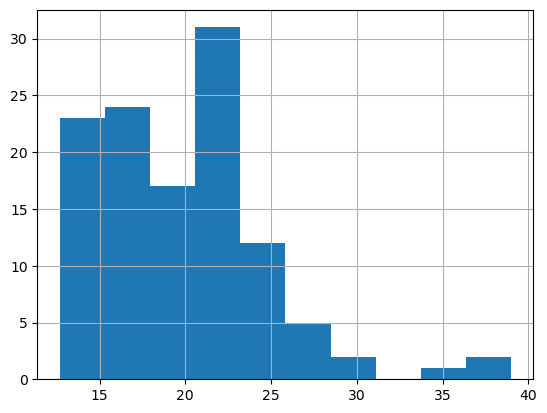

In [82]:
#Let's look at 1999's distribution
ninenine_fuel.hist()

<Axes: >

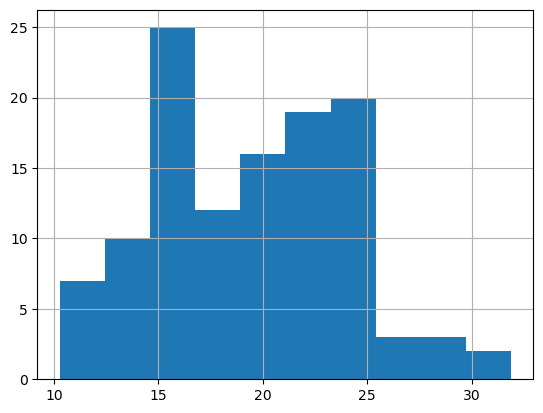

In [83]:
#Let's look at 2008's distribution
oeight_fuel.hist()

<b> Step 2: Set Hypothesis</b>
<br>
- $H_0$: The fuel efficiency in cars made in 2008 is equal to the fuel efficiency in cars manufactured in 1999
<br>
- $H_a$: The fuel efficiency in cars made in 2008 is inequal to the fuel efficiency in cars manufactured in 1999

<b>Step 3: Set Alpha

In [84]:
α= .05

<b>Step 4: Verify Assumptions</b>

<div class="alert alert-block alert-info">
<b>We need to ask ourselves:</b> 

1. Are the samples independent? 
    - YES, two seperate data sets
    - If they were not independent, pandas masking would not have worked the way it did
2. Is there normality?      
    - YES, we are told in the example that it is normal distribution
    - NOT normal BUT there are more than 30 sample size (see below)
3. Is there equal variance?  
    - Yes, proved by levene test (see below)
</div>    

#2. Normal distribution or Sample size larger than 30?

In [85]:
# to find sample size- must more than 30 to meet assumption
ninenine_fuel.count(), oeight_fuel.count()

(117, 117)

#3. Is there equal variance?

In [86]:
stat, pval = stats.levene(ninenine_fuel, oeight_fuel)
if pval < α:
    print('we can reject the null hypothesis and posit that variance is inequal')

<b>Step 5: Compute Test Statistics</b>

In [87]:
t, p = stats.ttest_ind(oeight_fuel, ninenine_fuel)
t,p, α

(-0.3011962975077886, 0.7635345888327115, 0.05)

In [88]:
p < α

False

<b>Step 6: Decide</b>

In [89]:
print(f'''
Because p ({pval:.3f}) > alpha (.05), we fail to reject the null\
 hypothesis that there is no difference in fuel-efficency in cars\
 from 2008 and 1999.
''') 
   


Because p (0.860) > alpha (.05), we fail to reject the null hypothesis that there is no difference in fuel-efficency in cars from 2008 and 1999.



### B) Are compact cars more fuel-efficient than the average car?

<div class="alert alert-block alert-info">
<b>We are comparing</b>: average mileage (numeric/continious) vs two car types (distinct/categorical)
<br>
<br>
Therefore, we will use:
<br>
<br>
one sample- only looking at compact cars average
<br>
one tailed- MORE fuel efficient (as opposed to: is there a difference in fuel)
    </div> 


In [90]:
#Let's create a dataset for only compact car mileage
fuel_compact = mpg[mpg['class'] == 'compact'].avg_fe

#Let's create a dataset for overall mileage
fuel_overall = mpg.avg_fe.mean()

<b>Step 1: Plot Distribution</b>

(array([ 9., 13., 14.,  5.,  2.,  2.,  1.,  0.,  0.,  1.]),
 array([18.75      , 20.64642857, 22.54285714, 24.43928571, 26.33571429,
        28.23214286, 30.12857143, 32.025     , 33.92142857, 35.81785714,
        37.71428571]),
 <BarContainer object of 10 artists>)

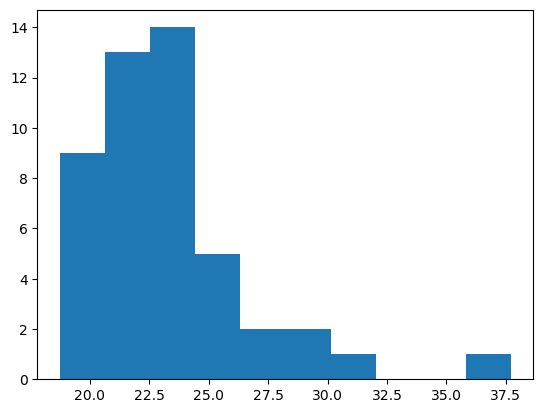

In [91]:
# look at the distribution. N >30
plt.hist(fuel_compact)

<Axes: >

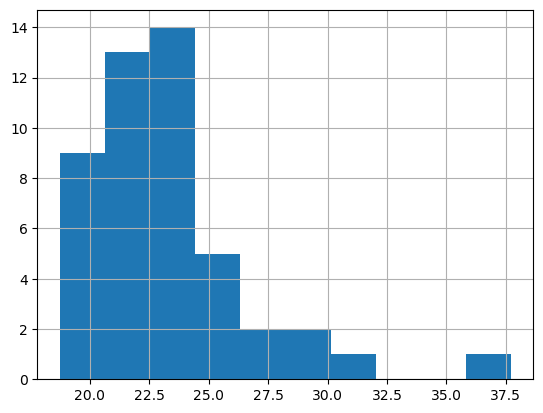

In [92]:
fuel_compact.hist()

In [93]:
t, p = stats.ttest_1samp(fuel_compact, fuel_overall)
t, p

(7.512360093161361, 1.5617666348807277e-09)

<b>Step 2: Set Hypothesis</b>

- $H_0$: : there is no between compact car fuel-efficiency and the average fuel efficiency
<br>
- $H_a$: there is a between compact car fuel-efficiency and the average fuel efficiency

<b>Step 3: Set Alpha</b>

In [94]:
α = 0.05

<b>Step 4: Verify Assumption</b>

<div class="alert alert-block alert-info">
<b>We need to ask ourselves:</b> 

1. Are the samples independent? 
    - Not relevant- there is only one sample
2. Is there normality?      
    - roughly normal distibution 
    - there are more than 30 sample size (see below)
3. Is there equal variance?  
    - Not relevant- there is only one sample
</div> 

#2. Is there normality?

In [95]:
#must be more than 30
fuel_compact.count()

47

<b>Step 5: Compute Test Statistics</b>

In [96]:
t, p = stats.ttest_1samp(fuel_compact, fuel_overall)
t,p

(7.512360093161361, 1.5617666348807277e-09)

<b>Step 6: Decide</b>

In [97]:
if (t > 0) and ((p/2) < α):
    print('we can reject the null hypothesis')

we can reject the null hypothesis


In [98]:
print(f'''
Because p/2 ({p/2:.12f}) < alpha (.05), we reject the null hypothesis that there is no difference in fuel-efficiency between compact cars and the overall average.
''')


Because p/2 (0.000000000781) < alpha (.05), we reject the null hypothesis that there is no difference in fuel-efficiency between compact cars and the overall average.



### C) Do manual cars get better gas mileage than automatic cars?

In [99]:
# we will look at average fuel efficiency for auto cars, and manual cars
manual_fe = mpg[mpg.trans.str.contains('manual')].avg_fe
auto_fe = mpg[mpg.trans.str.contains('auto')].avg_fe

<b>Step 1: Plot distribution</b>

(array([ 2.,  9., 10., 21., 23.,  5.,  4.,  1.,  0.,  2.]),
 array([10.28571429, 13.15587703, 16.02603978, 18.89620253, 21.76636528,
        24.63652803, 27.50669078, 30.37685353, 33.24701627, 36.11717902,
        38.98734177]),
 <BarContainer object of 10 artists>)

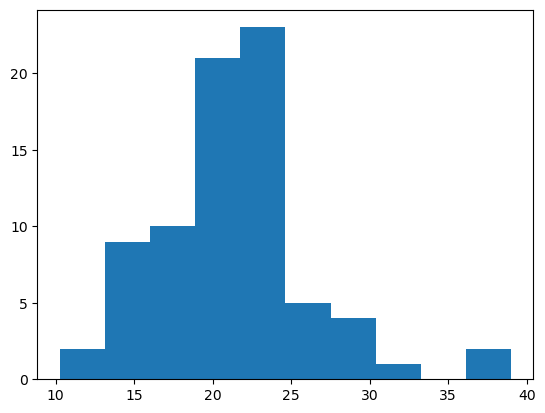

In [100]:
# look at the distribution. N >30
plt.hist(manual_fe)

(array([ 6., 35., 27., 22., 33., 18.,  9.,  4.,  2.,  1.]),
 array([10.28571429, 12.65428571, 15.02285714, 17.39142857, 19.76      ,
        22.12857143, 24.49714286, 26.86571429, 29.23428571, 31.60285714,
        33.97142857]),
 <BarContainer object of 10 artists>)

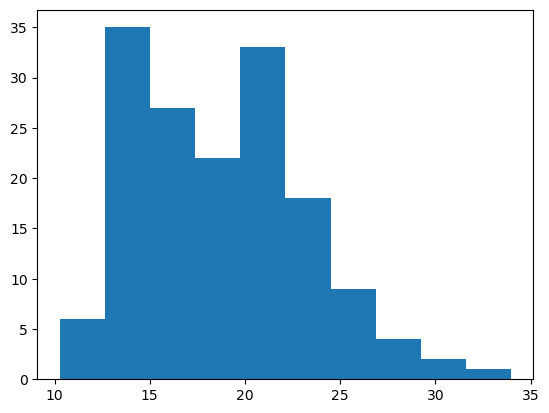

In [101]:
# look at the distribution. N >30
plt.hist(auto_fe)

<b>Step 2: Set Hypothesis</b>

- $H_0$: The average mileage of manual cars =< the average mileage in automatic cars
<br>
- $H_a$: The average mileage of manual cars > the average mileage in automatic cars

<b>Step 3: Set Alpha</b>

In [102]:
α = 0.05

<b>Step 4: Verify 3 Assumptions</b>

<div class="alert alert-block alert-info">
<b>We need to ask ourselves:</b> 

1. Are the samples independent? 
    - Yes, dealing with manual AND automatic cars
2. Is there normality?      
    - YES, normal distibution 
    - YES, there are more than 30 sample size (see below)
3. Is there equal variance?  
    - False, proved by levene test (see below)
</div> 

#2. Is there normality?

In [103]:
#must be more than 30
auto_fe.count(), auto_fe.count()

(157, 157)

#3. Is there equal variance?

In [104]:
#check variance
auto_fe.var(), manual_fe.var()

(20.428279095002054, 25.665633639828275)

In [105]:
stats.levene(manual_fe, auto_fe)

LeveneResult(statistic=0.013901207169738269, pvalue=0.9062462281015493)

<b>Step 5: Compute Test Statistics</b>

In [106]:
t, p = stats.ttest_ind(manual_fe, auto_fe, equal_var = False)
t,p

(4.47444321386703, 1.5980702702079528e-05)

<b>Step 6: Decide</b>

In [107]:
if (t > 0) and ((p/2) < α):
    print('We can reject our null hypothesis')
else:
    print('we cannot reject our null hypothesis')

We can reject our null hypothesis


In [108]:
print(f'''
Because p/2 ({p/2:.6f}) < alpha (.05), we reject the null hypothesis that there is no difference in gas mileage between manual and automatic cars
''')


Because p/2 (0.000008) < alpha (.05), we reject the null hypothesis that there is no difference in gas mileage between manual and automatic cars



In [109]:
## just look at the means to visually confirm your decision
manual_fe.mean(), auto_fe.mean()

(21.629228592155208, 18.583199507835744)